<a href="https://colab.research.google.com/github/RMMalshaPiumini/Loan-Approval-Prediction/blob/part-b-v1/copilot_helps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [22]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

**Upload Dataset**

In [2]:
# Upload once, pick CSV file (e.g., loan_approval_data.csv)
uploaded = files.upload()                         # choose .csv
fname = list(uploaded.keys())[0]                  # first file name
df = pd.read_csv(fname, low_memory=False)         # read CSV

print("Loaded:", fname, "→ shape:", df.shape)
df.head(3)

Saving loan_approval_dataset.csv to loan_approval_dataset.csv
Loaded: loan_approval_dataset.csv → shape: (58645, 16)


,id,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status,max_allowed_loan,Credit_Application_Acceptance
0,35437,21,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved,-2426900,0.0
1,53756,21,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved,-111739,0.0
2,42205,23,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved,-89000,0.0


# **Part A**

**Task 1**

In [3]:
# Define columns to retain for classification modeling
retain_columns = [
    'age', 'Sex', 'Education_Qualifications', 'income', 'home_ownership',
    'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate',
    'loan_income_ratio', 'payment_default_on_file', 'credit_history_length',
    'loan_approval_status'
]

# Define columns to drop
drop_columns = [col for col in df.columns if col not in retain_columns]

# Create a new DataFrame with retained columns
df_retained = df[retain_columns]

# Display retained and dropped columns
print("Retained Columns for Classification Modeling:\n", retain_columns)
print("\nDropped Columns:\n", drop_columns)

# Show basic info of the retained dataset
df_retained.info()

Retained Columns for Classification Modeling:
 ['age', 'Sex', 'Education_Qualifications', 'income', 'home_ownership', 'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'payment_default_on_file', 'credit_history_length', 'loan_approval_status']

Dropped Columns:
 ['id', 'max_allowed_loan', 'Credit_Application_Acceptance']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       58639 non-null  object 
 1   Sex                       221 non-null    object 
 2   Education_Qualifications  58645 non-null  object 
 3   income                    58645 non-null  int64  
 4   home_ownership            58645 non-null  object 
 5   emplyment_length          58645 non-null  int64  
 6   loan_intent               58645 non-null  object 
 7   loan_amount              

**Task 2**

Basic Statistical Description:


,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58639,221,58645,5.864500e+04,58645,58645.000000,58645,58645.000000,58634.000000,58645.000000,58640,58645.000000,58644
unique,58,2,6,NaN,4,NaN,6,NaN,NaN,NaN,4,NaN,8
top,23,M,Unknown,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,N,NaN,Approved
freq,7726,126,58303,NaN,30594,NaN,12271,NaN,NaN,NaN,49933,NaN,50210
mean,NaN,NaN,NaN,6.404617e+04,NaN,4.703487,NaN,9217.556518,10.685988,0.159238,NaN,5.813556,NaN
std,NaN,NaN,NaN,3.793111e+04,NaN,4.004982,NaN,5563.807384,3.161955,0.091692,NaN,4.029196,NaN
min,NaN,NaN,NaN,4.200000e+03,NaN,0.000000,NaN,500.000000,-11.140000,0.000000,NaN,2.000000,NaN
25%,NaN,NaN,NaN,4.200000e+04,NaN,2.000000,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,NaN
50%,NaN,NaN,NaN,5.800000e+04,NaN,4.000000,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,NaN
75%,NaN,NaN,NaN,7.560000e+04,NaN,7.000000,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,NaN



Variable Scale Types:


,0
age,object
Sex,object
Education_Qualifications,object
income,int64
home_ownership,object
emplyment_length,int64
loan_intent,object
loan_amount,int64
loan_interest_rate,float64
loan_income_ratio,float64


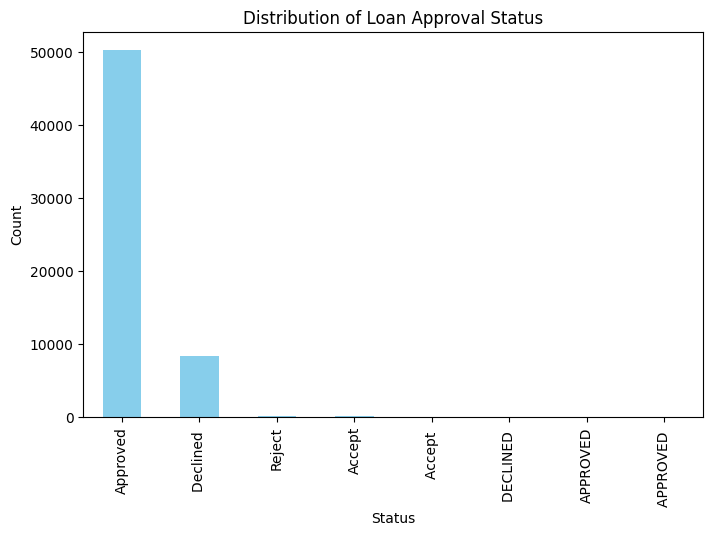

In [4]:
# Basic statistical description
print("Basic Statistical Description:")
display(df_retained.describe(include='all'))

# Variable scale types
print("\nVariable Scale Types:")
display(df_retained.dtypes)

# Plot distribution of target variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df_retained['loan_approval_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [5]:

# Count all unique values in 'loan_approval_status'
status_counts = df['loan_approval_status'].value_counts().reset_index()
status_counts.columns = ['Loan Approval Status', 'Count']

# Sort by count in descending order
status_counts_sorted = status_counts.sort_values(by='Count', ascending=False)

# Display the table
print(status_counts_sorted.to_string(index=False))


Loan Approval Status  Count
            Approved  50210
           Declined    8268
              Reject     78
              Accept     58
             Accept      21
           DECLINED       4
            APPROVED      3
           APPROVED       2


**Task 3**


**3a – Investigate issues (Evidence)**


In [6]:
def banner(t):
    print("\n" + "="*20 + f" {t} " + "="*20)

# --- Missingness overview for retained inputs + target ---
cols_to_audit = [
    "age",
    "Education_Qualifications",
    "income",
    "home_ownership",
    "emplyment_length",
    "loan_intent",
    "loan_amount",
    "loan_interest_rate",
    "loan_income_ratio",
    "payment_default_on_file",
    "credit_history_length",
    "loan_approval_status",
    "Sex"  # for evidence only: shows ~99.6% missing
]

banner("Missingness (count)")
print(df[cols_to_audit].isna().sum().sort_values(ascending=False))

# --- Show label inconsistencies for key categoricals (top 20 values, uppercased) ---
for c in ["loan_approval_status", "payment_default_on_file", "Education_Qualifications", "home_ownership", "loan_intent", "Sex"]:
    if c in df.columns:
        banner(f"Value audit: {c}")
        print(df[c].astype(str).str.strip().str.upper().value_counts(dropna=False).head(20))

# --- Age: mixed types evidence (non-numeric becomes NaN) ---
banner("Age mixed types: non-numeric count (via coercion)")
print("age non-numeric (will coerce to NaN):", pd.to_numeric(df["age"], errors="coerce").isna().sum())

# --- Outlier counts via IQR (evidence) ---
def iqr_outlier_counts(s):
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return int(((s < lower) | (s > upper)).sum()), (lower, upper)

banner("IQR outlier counts + bounds")
for col in ["income","emplyment_length","loan_amount","loan_income_ratio","credit_history_length"]:
    cnt, bounds = iqr_outlier_counts(df[col])
    print(f"{col}: outliers={cnt}, bounds={bounds}")

# --- Loan interest rate: missing + extreme evidence ---
lir = pd.to_numeric(df["loan_interest_rate"], errors="coerce")
banner("Loan interest rate missing + extremes")
print("Missing:", lir.isna().sum(), " | > 40%:", int((lir > 40).sum()), " | Max:", float(lir.max()))



==================== Missingness (count) ====================
Sex                         58424
loan_interest_rate             11
age                             6
payment_default_on_file         5
loan_approval_status            1
emplyment_length                0
home_ownership                  0
income                          0
Education_Qualifications        0
loan_income_ratio               0
loan_amount                     0
loan_intent                     0
credit_history_length           0
dtype: int64

==================== Value audit: loan_approval_status ====================
loan_approval_status
APPROVED    50215
DECLINED     8272
ACCEPT         79
REJECT         78
NAN             1
Name: count, dtype: int64

==================== Value audit: payment_default_on_file ====================
payment_default_on_file
N      49933
Y       8696
NO         7
NAN        5
YES        4
Name: count, dtype: int64

==================== Value audit: Education_Qualifications =============

In [9]:
# =========================
# Task (3b) – Implement mitigations (Cleaning Pipeline with BEFORE/AFTER prints)
# =========================
# df = raw.copy()

def banner(t):
    print("\n" + "="*20 + f" {t} " + "="*20)

def iqr_bounds(s):
    s = pd.to_numeric(s, errors="coerce")
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

def iqr_outlier_count(s):
    low, up = iqr_bounds(s)
    s = pd.to_numeric(s, errors="coerce")
    return int(((s < low) | (s > up)).sum())

# --- Sex: ~99.6% missing -> Drop column (evidence) ---
banner("SEX: BEFORE drop")
print("NaN count:", df["Sex"].isna().sum(), "/", len(df))
print("Value counts (upper, head):")
print(df["Sex"].astype(str).str.strip().str.upper().value_counts(dropna=False).head())
df = df.drop(columns=["Sex"])

# --- Age: convert to numeric + median impute (robust to skew) ---
banner("AGE: convert to numeric + median impute")
age_extracted = df["age"].astype(str).str.extract(r"(\d+\.?\d*)", expand=False)
age_num = pd.to_numeric(age_extracted, errors="coerce")
print("Non-numeric/NaN BEFORE:", age_num.isna().sum())
age_med = age_num.median()
df["age"] = age_num.fillna(age_med)
print("Median used:", age_med, " | NaN AFTER:", df["age"].isna().sum())

# --- Loan interest rate: impute missing with median (robust to outliers) ---
banner("LOAN INTEREST RATE: median impute missing")
lir = pd.to_numeric(df["loan_interest_rate"], errors="coerce")
print("Missing BEFORE:", lir.isna().sum())
lir_med = lir.median()
df["loan_interest_rate"] = lir.fillna(lir_med)
print("Median used:", lir_med, " | Missing AFTER:", df["loan_interest_rate"].isna().sum())

# --- Payment default on file: normalize to {Y,N} + mode impute ---
banner("PAYMENT DEFAULT ON FILE: normalize + mode impute")
def map_yn(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in {"y","yes","1","true"}: return "Y"
    if s in {"n","no","0","false"}: return "N"
    return np.nan

print("Top BEFORE:\n", df["payment_default_on_file"].astype(str).str.strip().str.upper().value_counts(dropna=False).head(10))
mapped = df["payment_default_on_file"].apply(map_yn)
mode_val = mapped.mode(dropna=True)[0] if not mapped.mode(dropna=True).empty else "N"
df["payment_default_on_file"] = mapped.fillna(mode_val)
print("Mode used:", mode_val)
print("AFTER:\n", df["payment_default_on_file"].value_counts())

# --- Target: standardize to {Approved, Declined} + drop missing target ---
banner("TARGET loan_approval_status: standardize + drop missing")
def map_status(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in {"approved","accept","accepted","approve"}: return "Approved"
    if s in {"declined","reject","rejected","decline"}: return "Declined"
    return np.nan

print("Top BEFORE:\n", df["loan_approval_status"].astype(str).str.strip().str.upper().value_counts(dropna=False).head(10))
mapped_y = df["loan_approval_status"].apply(map_status)
print("Missing AFTER mapping:", mapped_y.isna().sum())
df = df.loc[mapped_y.notna()].copy()
df["loan_approval_status"] = mapped_y.loc[mapped_y.notna()]
print("AFTER:\n", df["loan_approval_status"].value_counts())

# --- Categorical cleanup: strip/uppercase and keep 'UNKNOWN' informative level ---
banner("EDUCATION QUALIFICATIONS: strip/uppercase + keep 'UNKNOWN'")
df["Education_Qualifications"] = (df["Education_Qualifications"]
                                  .astype(str).str.strip().str.upper()
                                  .replace({'': np.nan}).fillna("UNKNOWN"))
print(df["Education_Qualifications"].value_counts().head())

for c in ["home_ownership","loan_intent"]:
    banner(f"{c}: strip/uppercase + fill 'UNKNOWN'")
    df[c] = (df[c].astype(str).str.strip().str.upper()
             .replace({'': np.nan}).fillna("UNKNOWN"))
    print(df[c].value_counts().head())

# --- IQR clip outliers (income, emplyment_length, loan_amount, loan_income_ratio, credit_history_length) ---
banner("OUTLIERS: IQR-clip selected numeric features")
clip_cols = ["income","emplyment_length","loan_amount","loan_income_ratio","credit_history_length"]
print("BEFORE outlier counts:", {c: iqr_outlier_count(df[c]) for c in clip_cols})
for c in clip_cols:
    low, up = iqr_bounds(df[c])
    df[c] = pd.to_numeric(df[c], errors="coerce").clip(lower=low, upper=up)
print("AFTER outlier counts:", {c: iqr_outlier_count(df[c]) for c in clip_cols})

# --- Drop columns not for Part A classification ---
banner("DROP non-Part-A columns: id, max_allowed_loan, Credit_Application_Acceptance")
to_drop = ["id", "max_allowed_loan", "Credit_Application_Acceptance"]
df = df.drop(columns=to_drop)
print("Columns now:", list(df.columns))
print("Shape now:", df.shape)

# --- Save cleaned dataset for Part A modelling (Task 4 onward) ---
out_fn = "loan_partA_clean.csv"
df.to_csv(out_fn, index=False)
print("Saved:", out_fn)



==================== SEX: BEFORE drop ====================
NaN count: 58424 / 58645
Value counts (upper, head):
Sex
NAN    58424
M        126
F         95
Name: count, dtype: int64

==================== AGE: convert to numeric + median impute ====================
Non-numeric/NaN BEFORE: 9
Median used: 26.0  | NaN AFTER: 0

==================== LOAN INTEREST RATE: median impute missing ====================
Missing BEFORE: 11
Median used: 10.75  | Missing AFTER: 0

==================== PAYMENT DEFAULT ON FILE: normalize + mode impute ====================
Top BEFORE:
 payment_default_on_file
N      49933
Y       8696
NO         7
NAN        5
YES        4
Name: count, dtype: int64
Mode used: N
AFTER:
 payment_default_on_file
N    49945
Y     8700
Name: count, dtype: int64

==================== TARGET loan_approval_status: standardize + drop missing ====================
Top BEFORE:
 loan_approval_status
APPROVED    50215
DECLINED     8272
ACCEPT         79
REJECT         78
NAN           

**Task 4**

In [13]:
# 1. Load the cleaned dataset
df = pd.read_csv("loan_partA_clean.csv")

# 2. Separate Features (X) and Target (y)
X = df.drop('loan_approval_status', axis=1)
y = df['loan_approval_status']

# --- Target Encoding ---
# Encode the target into numerical form (0, 1) for Scikit-learn, needed for AUC and CM.
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_.tolist() # ['Approved', 'Declined']

# 3. Encode Categorical Features (One-Hot Encoding on ALL features in X)
# The numerical features remain unchanged during this step.
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Split Data (70% Train, 30% Test)
# Use y_encoded for stratification and model training
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 5. Define Models
models = {
    "Naive Bayes (NB)": GaussianNB(),
    # Increased max_iter for Logistic Regression stability with more features
    "Logistic Regression (LR)": LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    "Random Forest (RF)": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}

# 6. Train and Evaluate Function (Full metrics and CM)
def evaluate_model_full(model, X_train, y_train, X_test, y_test, target_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Probabilities for AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    risk_class = 'Declined'

    results = {
        "Accuracy": report['accuracy'],
        "Recall": report[risk_class]['recall'],
        "Precision": report[risk_class]['precision'],
        "F1-Score": report[risk_class]['f1-score'],
        "AUC-ROC": auc_roc,
        "CM": cm
    }
    return results

# 7. Run Evaluation and store results
performance_metrics_full = {}
for name, model in models.items():
    metrics = evaluate_model_full(model, X_train, y_train_enc, X_test, y_test_enc, target_names)
    performance_metrics_full[name] = metrics

# --- Create Summary DataFrame (metrics_df) ---
metrics_df = pd.DataFrame({
    name: {
        'Accuracy': data['Accuracy'],
        'Recall': data['Recall'],
        'Precision': data['Precision'],
        'F1-Score': data['F1-Score'],
        'AUC-ROC': data['AUC-ROC']
    } for name, data in performance_metrics_full.items()
}).T

# --- Create CM Output Dictionary (cm_output) and print CMs ---
cm_output = {}
print("\n--- Confusion Matrices (All Features) ---")
for name, data in performance_metrics_full.items():
    cm_output[name] = pd.DataFrame(data['CM'], index=target_names, columns=target_names)
    print(f"\n{name} CM:")
    print(cm_output[name])

# --- Print Final Metrics ---
print("\n--- Model Performance Metrics (Targeting 'Declined', ALL Features) ---")
print(metrics_df)


--- Confusion Matrices (All Features) ---

Naive Bayes (NB) CM:
          Approved  Declined
Approved     14894       195
Declined      1876       629

Logistic Regression (LR) CM:
          Approved  Declined
Approved     14950       139
Declined      2094       411

Random Forest (RF) CM:
          Approved  Declined
Approved     14937       152
Declined       802      1703

--- Model Performance Metrics (Targeting 'Declined', ALL Features) ---
                          Accuracy    Recall  Precision  F1-Score   AUC-ROC
Naive Bayes (NB)          0.882289  0.251098   0.763350  0.377891  0.857619
Logistic Regression (LR)  0.873082  0.164072   0.747273  0.269067  0.787542
Random Forest (RF)        0.945777  0.679840   0.918059  0.781193  0.939502


**Task 5**

Performs the hyperparameter tuning on the best model, Random Forest, using GridSearchCV

In [14]:
# --- Data Preparation (Using ALL Features) ---
df = pd.read_csv("loan_partA_clean.csv")
X = df.drop('loan_approval_status', axis=1)
y = df['loan_approval_status']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_names = le.classes_.tolist() # ['Approved', 'Declined']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# 1. Define Untuned Model (for comparison)
rf_initial = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_initial.fit(X_train, y_train_enc)
y_pred_initial = rf_initial.predict(X_test)

# 2. Define Tuning Grid (Used to constrain complexity and fight overfitting)
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [8, 10, 12],      # Max depth (Lowering this combats overfitting)
    'min_samples_leaf': [2, 5]     # Minimum samples required at leaf node
}

# 3. Instantiate and Fit GridSearchCV
rf_tuned = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(
    estimator=rf_tuned,
    param_grid=param_grid,
    scoring='f1', # Optimizing for F1-Score (balance of Precision/Recall)
    cv=5, # 5-fold cross-validation
    n_jobs=-1
)
grid_search.fit(X_train, y_train_enc)

# 4. Get the Best Tuned Model and Evaluate on Test Set
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

# 5. Calculate Metrics for Final Report
cm_initial = confusion_matrix(y_test_enc, y_pred_initial)
cm_tuned = confusion_matrix(y_test_enc, y_pred_tuned)

def get_metrics(y_true, y_pred, y_prob):
    return {
        'Recall': recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        'Precision': precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, pos_label=1, zero_division=0),
        'AUC-ROC': roc_auc_score(y_true, y_prob)
    }

# Predict probabilities for AUC calculation
y_prob_initial = rf_initial.predict_proba(X_test)[:, 1]
y_prob_tuned = best_rf_model.predict_proba(X_test)[:, 1]

metrics_initial = get_metrics(y_test_enc, y_pred_initial, y_prob_initial)
metrics_tuned = get_metrics(y_test_enc, y_pred_tuned, y_prob_tuned)

# --- Display Results for Report ---
print("\n========== Task 5e (ii) - Hyperparameters ==========")
print(f"Original Hyperparameters: {{'n_estimators': 100, 'max_depth': None (Default)}}")
print(f"Best Tuned Hyperparameters: {grid_search.best_params_}")

print("\n========== Task 5e (iii) - Confusion Matrices ==========")
print("\n--- Confusion Matrix BEFORE Tuning (RF) ---")
print(pd.DataFrame(cm_initial, index=target_names, columns=target_names))
print("\n--- Confusion Matrix AFTER Tuning (RF) ---")
print(pd.DataFrame(cm_tuned, index=target_names, columns=target_names))

print("\n========== Task 5e (iv) - 'USED' Metrics Comparison ==========")
comparison_df = pd.DataFrame({
    'Metric': ['Recall', 'Precision', 'F1-Score', 'AUC-ROC'],
    'Before Tuning': [metrics_initial['Recall'], metrics_initial['Precision'], metrics_initial['F1-Score'], metrics_initial['AUC-ROC']],
    'After Tuning': [metrics_tuned['Recall'], metrics_tuned['Precision'], metrics_tuned['F1-Score'], metrics_tuned['AUC-ROC']]
})
print(comparison_df)


========== Task 5e (ii) - Hyperparameters ==========
Original Hyperparameters: {'n_estimators': 100, 'max_depth': None (Default)}
Best Tuned Hyperparameters: {'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 100}

========== Task 5e (iii) - Confusion Matrices ==========

--- Confusion Matrix BEFORE Tuning (RF) ---
          Approved  Declined
Approved     14937       152
Declined       802      1703

--- Confusion Matrix AFTER Tuning (RF) ---
          Approved  Declined
Approved     14440       649
Declined       578      1927

========== Task 5e (iv) - 'USED' Metrics Comparison ==========
      Metric  Before Tuning  After Tuning
0     Recall       0.679840      0.769261
1  Precision       0.918059      0.748059
2   F1-Score       0.781193      0.758512
3    AUC-ROC       0.939502      0.939613


# **Part B**

**Task 1**

In [15]:
# Load the dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Display initial info to understand the 'Approved' status label and column names
print("Initial Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Loan Approval Status unique values:", df['loan_approval_status'].unique())

# Filter for 'Approved' clients
df_approved = df[df['loan_approval_status'] == 'Approved'].copy()

# Define columns to drop
# id: Unique identifier
# Sex: High missing values (based on Part A context)
# loan_approval_status: Constant 'Approved' after filtering
# Credit_Application_Acceptance: Redundant
cols_to_drop = ['id', 'Sex', 'loan_approval_status', 'Credit_Application_Acceptance']

# Create the regression subset
df_regression = df_approved.drop(columns=[c for c in cols_to_drop if c in df_approved.columns])

# Output dimensions
print("\nDimensions of retained dataset (Rows, Columns):")
print(df_regression.shape)

# Output list of retained features
print("\nList of features retained for regression:")
print(df_regression.columns.tolist())

# Check for missing values in retained dataset to confirm if Sex was the main issue or if others need handling
print("\nMissing values in retained dataset:")
print(df_regression.isnull().sum())

Initial Shape: (58645, 16)
Columns: ['id', 'age', 'Sex', 'Education_Qualifications', 'income', 'home_ownership', 'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'payment_default_on_file', 'credit_history_length', 'loan_approval_status', 'max_allowed_loan', 'Credit_Application_Acceptance']
Loan Approval Status unique values: ['Approved' 'APPROVED' 'APPROVED ' 'Declined ' 'DECLINED ' 'Reject' nan
 'Accept' 'Accept ']

Dimensions of retained dataset (Rows, Columns):
(50210, 12)

List of features retained for regression:
['age', 'Education_Qualifications', 'income', 'home_ownership', 'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'payment_default_on_file', 'credit_history_length', 'max_allowed_loan']

Missing values in retained dataset:
age                         5
Education_Qualifications    0
income                      0
home_ownership              0
emplyment_length            0
loan_intent     

/tmp/ipython-input-1469681136.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_approval_dataset.csv')


In [19]:
df.columns = df.columns.str.strip()

# Standardize Loan Approval Status
# Map variations to 'Approved' and 'Declined'
status_map = {
    'Approved': 'Approved',
    'APPROVED': 'Approved',
    'APPROVED ': 'Approved',
    'Accept': 'Approved',
    'Accept ': 'Approved',
    'Declined ': 'Declined',
    'DECLINED ': 'Declined',
    'Reject': 'Declined'
}
# Apply map, handle NaN if necessary (though Part A dropped the single NaN)
df['loan_approval_status'] = df['loan_approval_status'].map(status_map)

# Filter for 'Approved'
df_approved = df[df['loan_approval_status'] == 'Approved'].copy()

# Drop columns
cols_to_drop = ['id', 'Sex', 'loan_approval_status', 'Credit_Application_Acceptance']
df_regression = df_approved.drop(columns=[c for c in cols_to_drop if c in df_approved.columns])

print("Standardized Approved count:", df_approved.shape[0])
print("Shape of regression dataset:", df_regression.shape)
print("Columns:", df_regression.columns.tolist())

# Show dimensions and retained features
print("\nDimensions of retained dataset (Rows, Columns):")
print(df_regression.shape)

print("\nFeatures retained for regression modelling:")
print(df_regression.columns.tolist())

Standardized Approved count: 50294
Shape of regression dataset: (50294, 12)
Columns: ['age', 'Education_Qualifications', 'income', 'home_ownership', 'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'payment_default_on_file', 'credit_history_length', 'max_allowed_loan']

Dimensions of retained dataset (Rows, Columns):
(50294, 12)

Features retained for regression modelling:
['age', 'Education_Qualifications', 'income', 'home_ownership', 'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'payment_default_on_file', 'credit_history_length', 'max_allowed_loan']


In [17]:
# Check statistics of max_allowed_loan for approved clients
print(df_regression['max_allowed_loan'].describe())
print("\nNegative values count:", (df_regression['max_allowed_loan'] < 0).sum())

count    5.029400e+04
mean     3.292368e+05
std      5.559500e+07
min     -2.426900e+06
25%      4.909850e+04
50%      6.942900e+04
75%      9.899000e+04
max      1.246799e+10
Name: max_allowed_loan, dtype: float64

Negative values count: 3


**Task 2**

In [20]:
# --- STEP 1: Data Cleaning for Plotting ---
# We need to ensure data is numeric for plotting.
# This repeats some cleaning from Part A to ensure this subset is clean.

# 1. Clean 'age': Force to numeric, coerce errors (like "Twenty Seven") to NaN, then fill
df_regression['age'] = pd.to_numeric(df_regression['age'], errors='coerce')
df_regression['age'] = df_regression['age'].fillna(df_regression['age'].median())

# 2. Clean 'loan_interest_rate': Handle missing values
df_regression['loan_interest_rate'] = df_regression['loan_interest_rate'].fillna(df_regression['loan_interest_rate'].median())

# 3. Clean Categorical strings: Strip whitespace and uppercase
categorical_cols = ['Education_Qualifications', 'home_ownership', 'loan_intent', 'payment_default_on_file']
for col in categorical_cols:
    df_regression[col] = df_regression[col].astype(str).str.strip().str.upper()

# 4. Clean 'payment_default_on_file': Normalize yes/no variations if any remain
# (Assuming simple 'Y'/'N' or similar, the strip/upper handles most)

/tmp/ipython-input-1647768671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_regression, x=col, ax=ax, palette='viridis',
/tmp/ipython-input-1647768671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_regression, x=col, ax=ax, palette='viridis',
/tmp/ipython-input-1647768671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_regression, x=col, ax=ax, palette='viridis',
/tmp/ipython-input-1647768671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

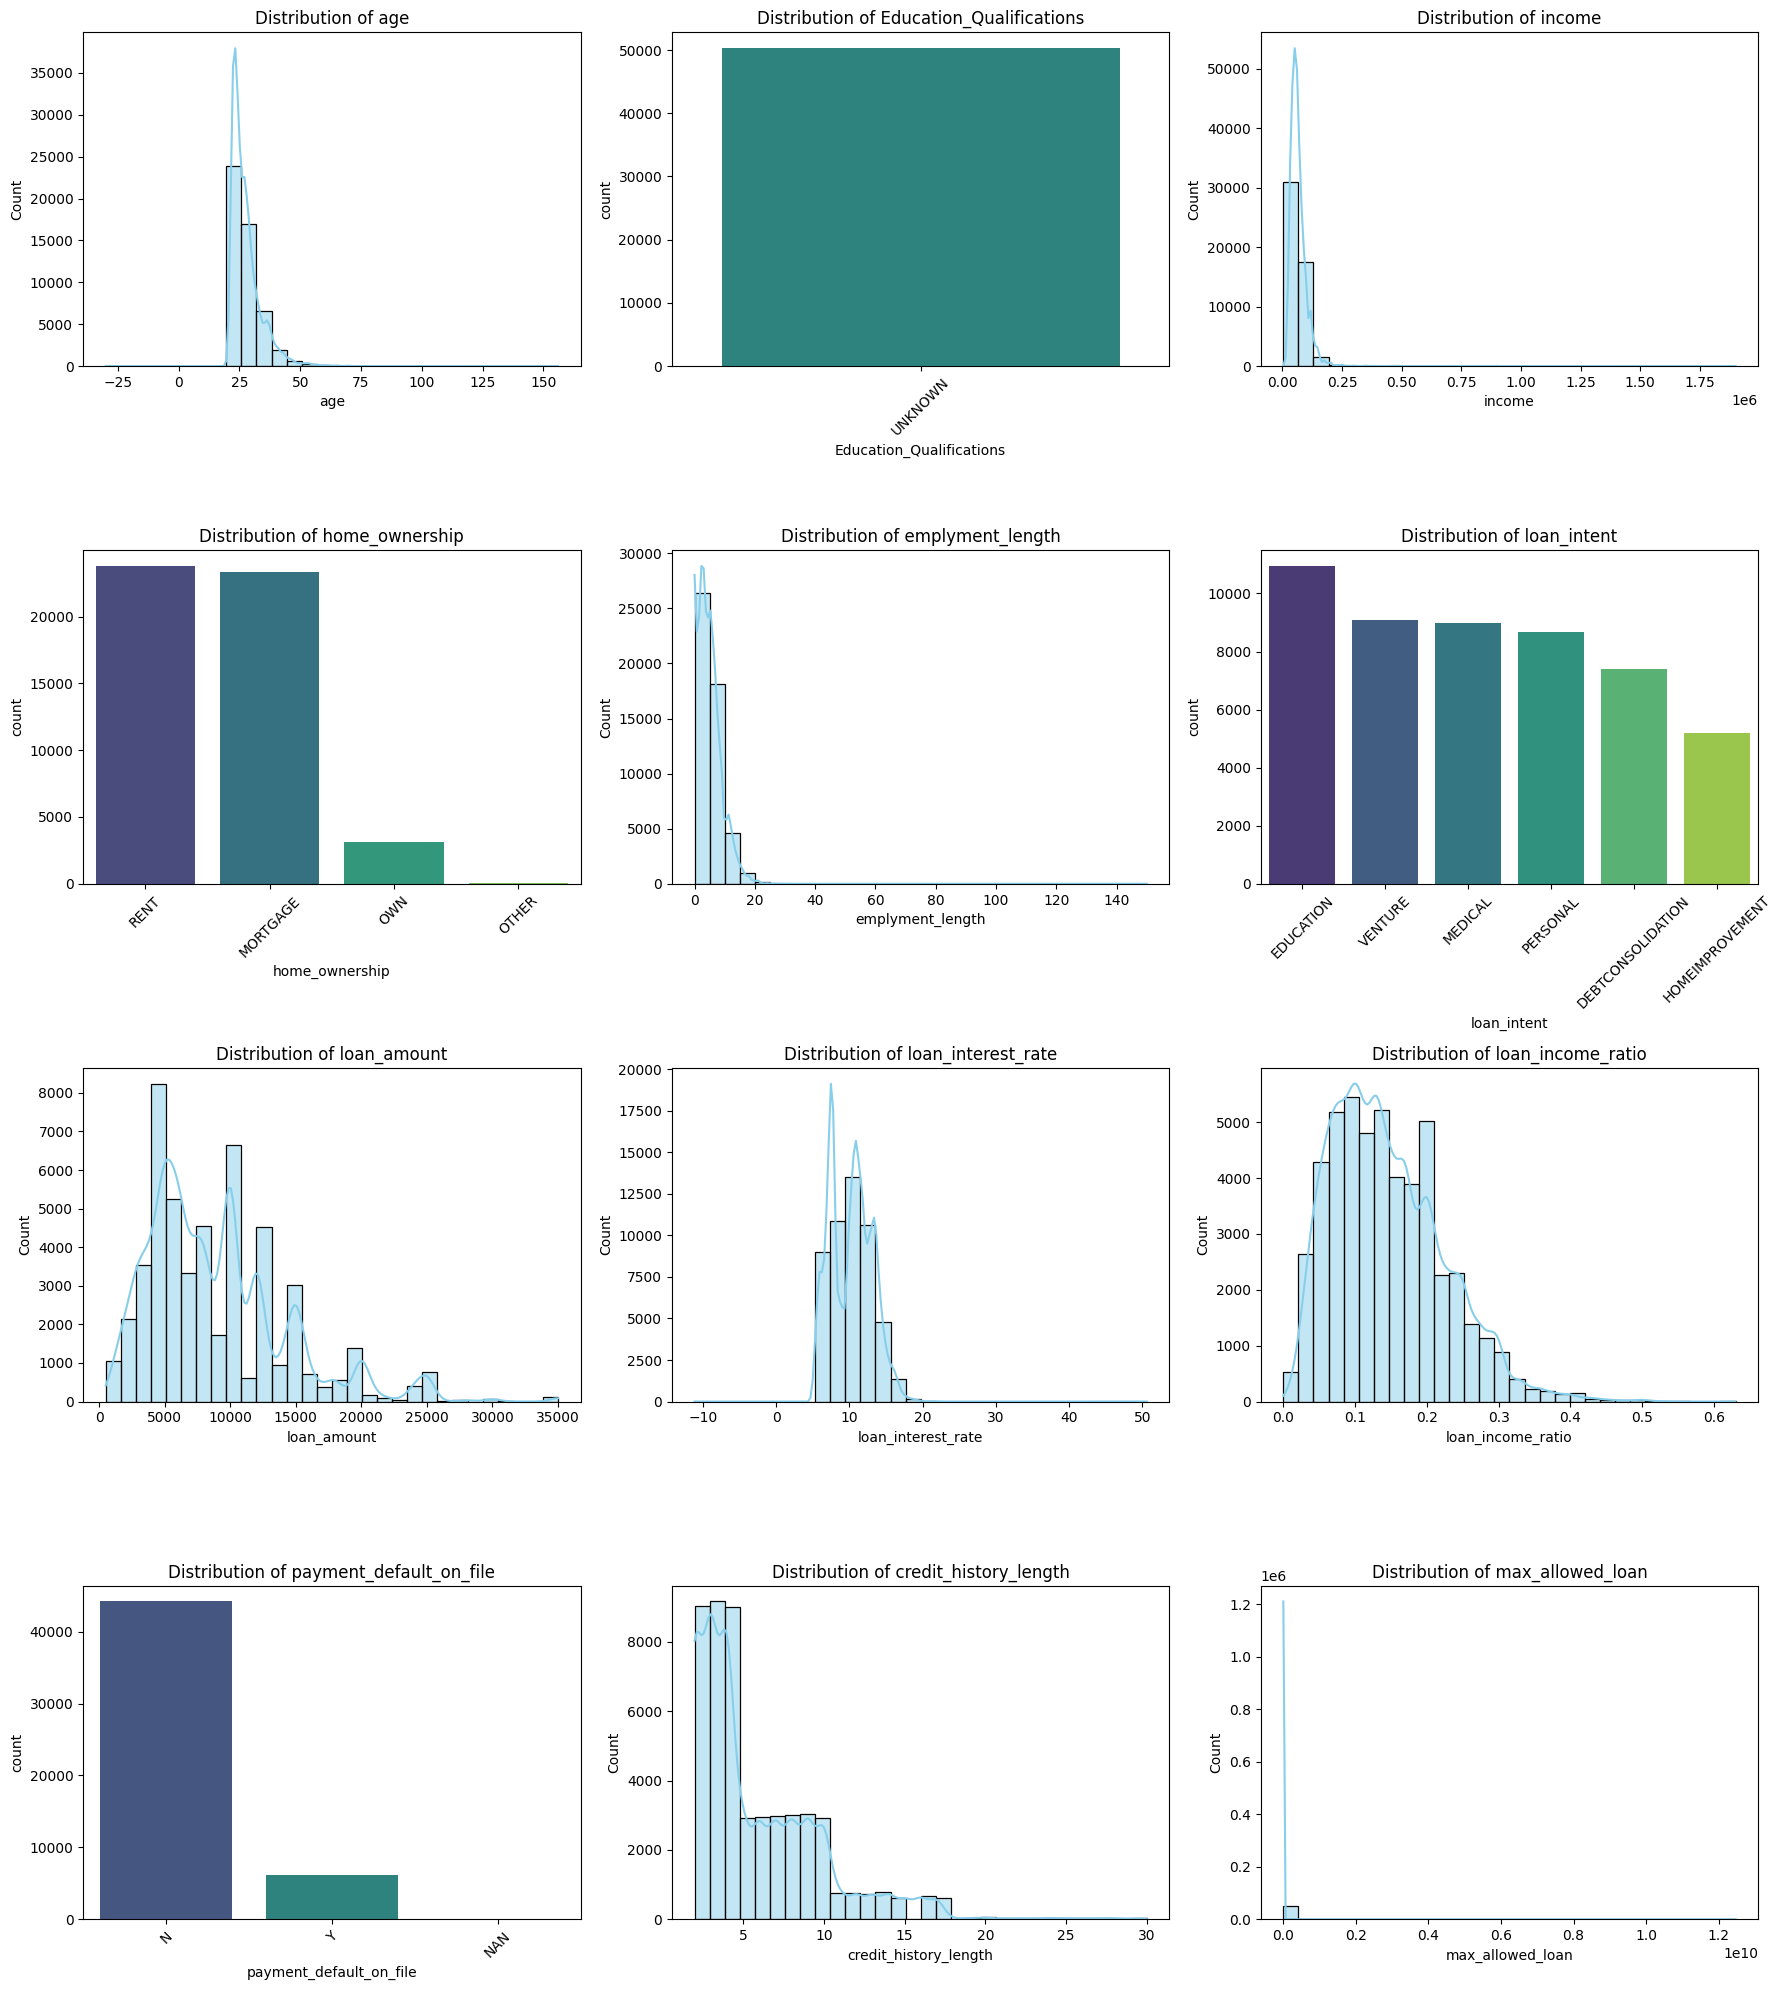

In [23]:
# --- STEP 2: Plotting Distributions ---

# Define groups
numerical_features = ['age', 'income', 'emplyment_length', 'loan_amount',
                      'loan_interest_rate', 'loan_income_ratio', 'credit_history_length',
                      'max_allowed_loan']
categorical_features = ['Education_Qualifications', 'home_ownership', 'loan_intent', 'payment_default_on_file']

# Set up the plot grid
total_cols = 3
total_rows = (len(df_regression.columns) + total_cols - 1) // total_cols

fig, axes = plt.subplots(total_rows, total_cols, figsize=(18, 5 * total_rows))
axes = axes.flatten()

for i, col in enumerate(df_regression.columns):
    ax = axes[i]
    if col in numerical_features:
        # Plot Histogram for Numerical
        sns.histplot(df_regression[col], kde=True, ax=ax, color='skyblue', bins=30)
        ax.set_title(f'Distribution of {col}')
    else:
        # Plot Bar Chart for Categorical
        sns.countplot(data=df_regression, x=col, ax=ax, palette='viridis',
                      order=df_regression[col].value_counts().index)
        ax.set_title(f'Distribution of {col}')
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Task 3**

In [24]:
# --- STEP 1: Clean Numerical Data for Statistics ---
# We must clean the data (like in Task 2) before we can describe it.

# Clean 'age': Force to numeric, coerce errors (like "Twenty Seven") to NaN, then fill
df_regression['age'] = pd.to_numeric(df_regression['age'], errors='coerce')
df_regression['age'] = df_regression['age'].fillna(df_regression['age'].median())

# Clean 'loan_interest_rate': Handle missing values
df_regression['loan_interest_rate'] = df_regression['loan_interest_rate'].fillna(df_regression['loan_interest_rate'].median())

# --- STEP 2: Generate Evidence for Scaling ---

# Define the numerical features
numerical_features = ['age', 'income', 'emplyment_length', 'loan_amount',
                      'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']
# Note: 'max_allowed_loan' (target) is excluded here to focus on *input* features.

# Print the summary statistics for numerical *input* features
print("--- Summary Statistics for Numerical Input Features ---")
print(df_regression[numerical_features].describe().to_markdown(floatfmt=".2f"))

--- Summary Statistics for Numerical Input Features ---
|       |      age |     income |   emplyment_length |   loan_amount |   loan_interest_rate |   loan_income_ratio |   credit_history_length |
|:------|---------:|-----------:|-------------------:|--------------:|---------------------:|--------------------:|------------------------:|
| count | 50294.00 |   50294.00 |           50294.00 |      50294.00 |             50294.00 |            50294.00 |                50294.00 |
| mean  |    27.55 |   66674.00 |               4.87 |       8888.99 |                10.26 |                0.15 |                    5.82 |
| std   |     6.01 |   39313.95 |               4.00 |       5328.36 |                 2.83 |                0.08 |                    4.00 |
| min   |   -30.00 |    4200.00 |               0.00 |        500.00 |               -11.14 |                0.00 |                    2.00 |
| 25%   |    23.00 |   45000.00 |               2.00 |       5000.00 |                 7.51 

**Task 4**